In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os

# Load the dataset
df = pd.read_csv('StressLevelDataset.csv')

In [6]:
# Feature scaling
features = df.drop('stress_level', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

In [7]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=0.95)
features_reduced = pca.fit_transform(features_scaled_df)
reduced_df = pd.DataFrame(features_reduced, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
reduced_df['stress_level'] = df['stress_level']

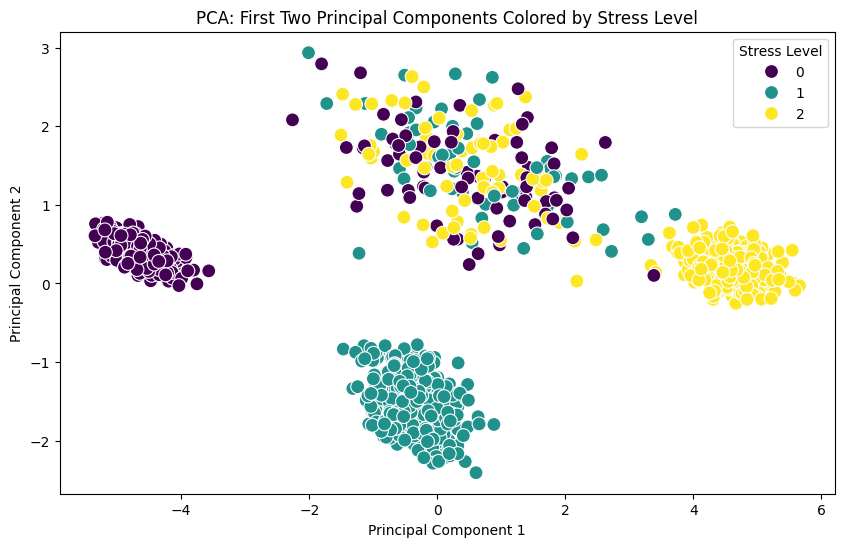

In [8]:
# Visualizations
# Scatter plot of first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_df['PC1'], y=reduced_df['PC2'], hue=reduced_df['stress_level'], palette='viridis', s=100)
plt.title('PCA: First Two Principal Components Colored by Stress Level')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Stress Level')
plt.show()

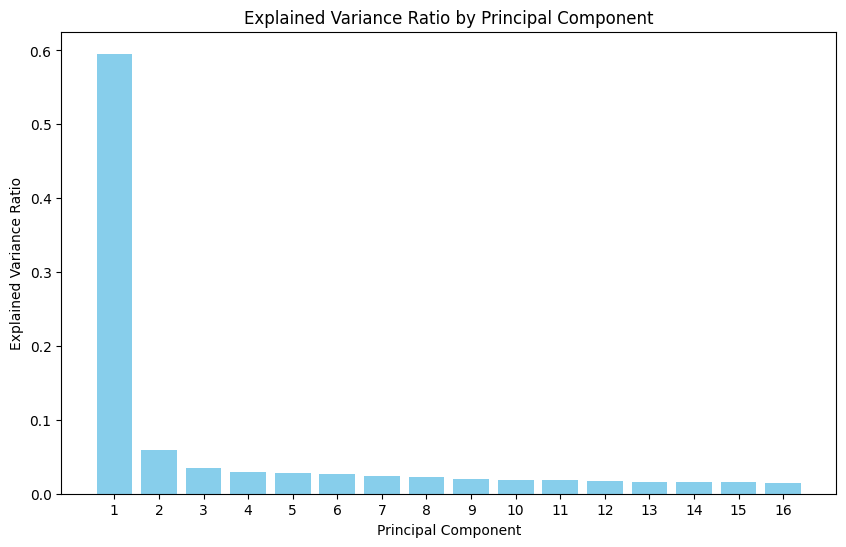

In [9]:
# Explained variance ratio plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()

In [10]:
# Train Random Forest Model
X = reduced_df.drop('stress_level', axis=1)
y = reduced_df['stress_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Model accuracy:", accuracy_score(y_test, predictions))

Model accuracy: 0.8772727272727273


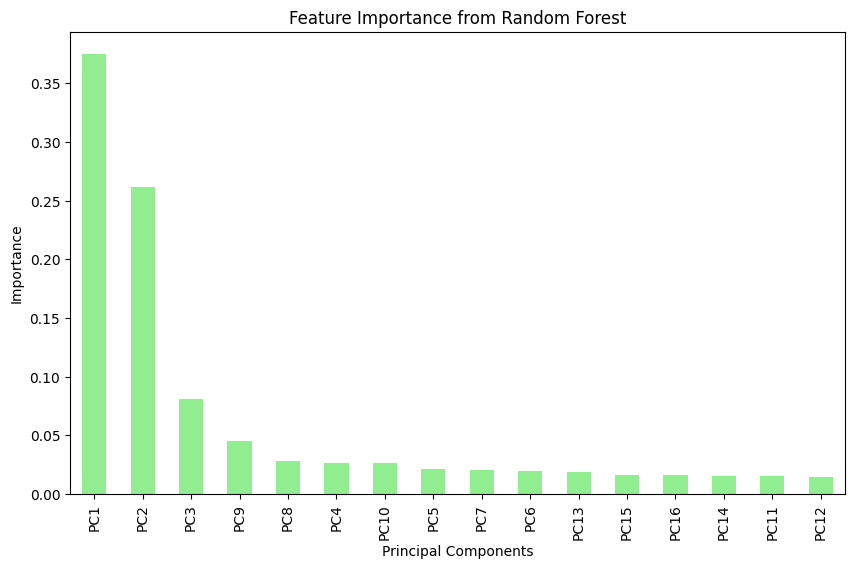

In [11]:
# Feature importance plot
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.show()

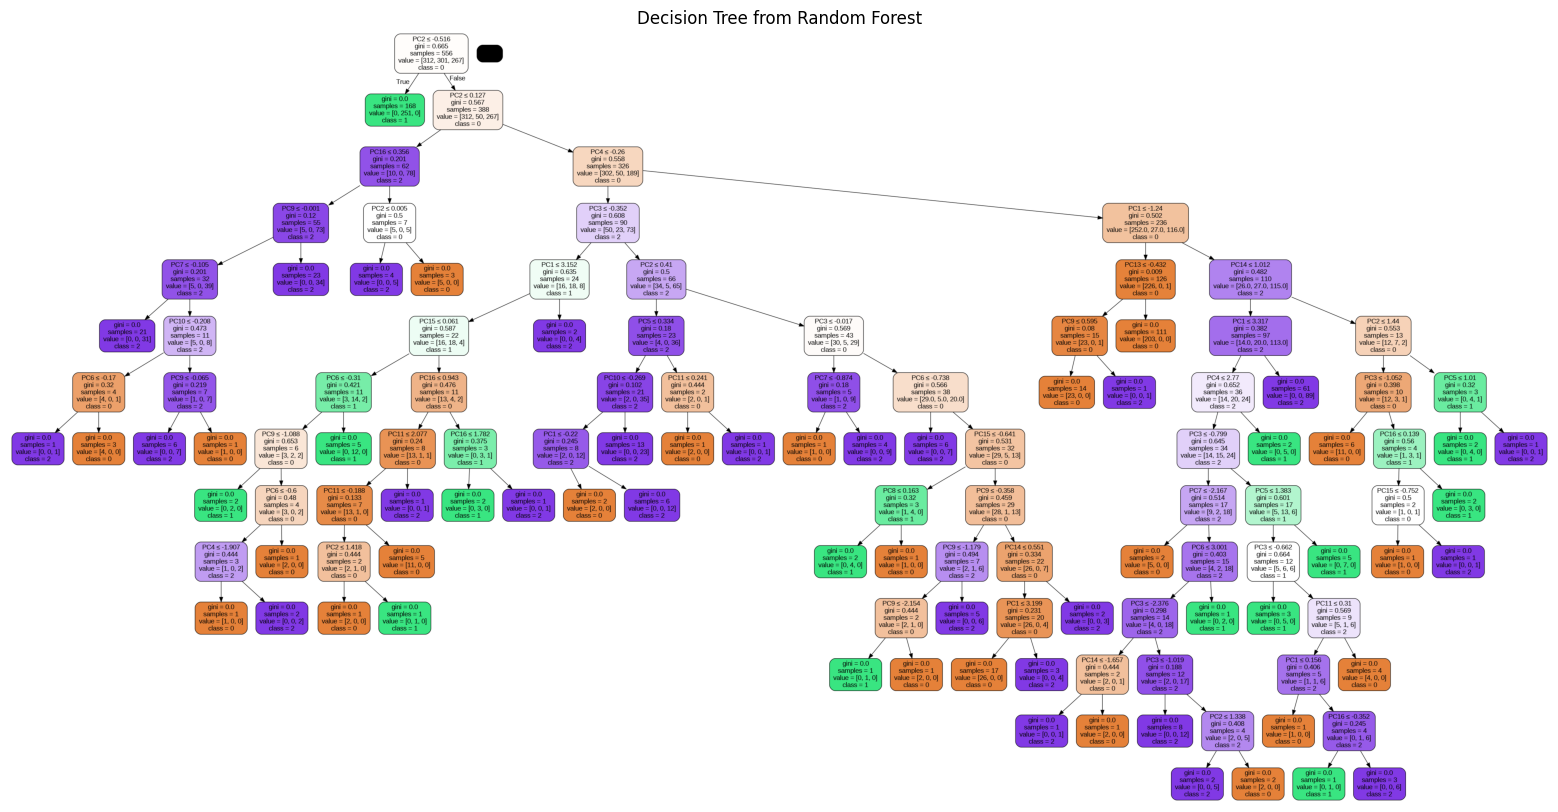

In [13]:
# Visualize a single decision tree from the Random Forest (first tree)
# Export the first tree
tree = model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['0', '1', '2'],
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Save and display the tree
graph.write_png('decision_tree.png')
plt.figure(figsize=(20, 10))
plt.imshow(plt.imread('decision_tree.png'))
plt.axis('off')
plt.title('Decision Tree from Random Forest')
plt.show()

In [15]:
# Save the reduced dataset
reduced_df.to_csv('StressLevelDataset_reduced.csv', index=False)